<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2'

In [4]:
os.listdir(base_path)

['data_add_delta_2_n250.csv',
 'data_add_delta_2_n120.csv',
 'data_add_delta_2_n60.csv',
 'data_add_delta_2_n30.csv',
 'data_add_delta_2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.700603,55.565178,30.270685,-39.048507,116.487959,150.215045,-33.727086
1,0.0,1.0,56.195288,22.786742,75.534870,2.002607,166.519508,148.546508,17.973000
2,0.0,2.0,36.185916,95.849370,21.644038,37.796100,201.475425,176.292985,25.182439
3,0.0,3.0,93.718231,41.994497,55.289162,28.676109,229.678000,182.058587,47.619413
4,0.0,4.0,44.810560,78.425739,97.422130,-110.800618,119.857811,232.602674,-112.744863
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,53.013707,98.197220,48.385891,-66.310764,143.286054,203.568278,-60.282225
59996,999.0,56.0,38.417319,80.379754,39.286930,24.868892,192.952894,164.999557,27.953338
59997,999.0,57.0,84.537959,88.854545,97.048503,-203.851926,76.589080,267.020228,-190.431147
59998,999.0,58.0,49.967593,90.182963,20.302199,-67.352494,103.100261,172.679130,-69.578869


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.700603,55.565178,30.270685,-39.048507,116.487959,150.215045,-33.727086
1,0.0,1.0,56.195288,22.786742,75.534870,2.002607,166.519508,148.546508,17.973000
2,0.0,2.0,36.185916,95.849370,21.644038,37.796100,201.475425,176.292985,25.182439
3,0.0,3.0,93.718231,41.994497,55.289162,28.676109,229.678000,182.058587,47.619413
4,0.0,4.0,44.810560,78.425739,97.422130,-110.800618,119.857811,232.602674,-112.744863
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,53.013707,98.197220,48.385891,-66.310764,143.286054,203.568278,-60.282225
59996,999.0,56.0,38.417319,80.379754,39.286930,24.868892,192.952894,164.999557,27.953338
59997,999.0,57.0,84.537959,88.854545,97.048503,-203.851926,76.589080,267.020228,-190.431147
59998,999.0,58.0,49.967593,90.182963,20.302199,-67.352494,103.100261,172.679130,-69.578869


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    59.700603  55.565178  ...  150.215045  -33.727086
      1.0    56.195288  22.786742  ...  148.546508   17.973000
      2.0    36.185916  95.849370  ...  176.292985   25.182439
      3.0    93.718231  41.994497  ...  182.058587   47.619413
      4.0    44.810560  78.425739  ...  232.602674 -112.744863
...                ...        ...  ...         ...         ...
999.0 55.0   53.013707  98.197220  ...  203.568278  -60.282225
      56.0   38.417319  80.379754  ...  164.999557   27.953338
      57.0   84.537959  88.854545  ...  267.020228 -190.431147
      58.0   49.967593  90.182963  ...  172.679130  -69.578869
      59.0   86.993382  20.833102  ...  162.745439   11.834683

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    59.700603  55.565178  ...  150.215045  -33.727086
      1.0    56.195288  22.786742  ...  148.546508   17.973000
      2.0    36.185916  95.849370  ...  176.292985   25.182439
      3.0    93.718231  41.994497  ...  182.058587   47.619413
      4.0    44.810560  78.425739  ...  232.602674 -112.744863
...                ...        ...  ...         ...         ...
999.0 55.0   53.013707  98.197220  ...  203.568278  -60.282225
      56.0   38.417319  80.379754  ...  164.999557   27.953338
      57.0   84.537959  88.854545  ...  267.020228 -190.431147
      58.0   49.967593  90.182963  ...  172.679130  -69.578869
      59.0   86.993382  20.833102  ...  162.745439   11.834683

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.700603,55.565178,30.270685,-39.048507,116.487959,150.215045,-33.727086
1,0.0,1.0,56.195288,22.786742,75.534870,2.002607,166.519508,148.546508,17.973000
2,0.0,2.0,36.185916,95.849370,21.644038,37.796100,201.475425,176.292985,25.182439
3,0.0,3.0,93.718231,41.994497,55.289162,28.676109,229.678000,182.058587,47.619413
4,0.0,4.0,44.810560,78.425739,97.422130,-110.800618,119.857811,232.602674,-112.744863
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,53.013707,98.197220,48.385891,-66.310764,143.286054,203.568278,-60.282225
59996,999.0,56.0,38.417319,80.379754,39.286930,24.868892,192.952894,164.999557,27.953338
59997,999.0,57.0,84.537959,88.854545,97.048503,-203.851926,76.589080,267.020228,-190.431147
59998,999.0,58.0,49.967593,90.182963,20.302199,-67.352494,103.100261,172.679130,-69.578869


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    59.700603  55.565178  ...  150.215045  -33.727086
      1.0    56.195288  22.786742  ...  148.546508   17.973000
      2.0    36.185916  95.849370  ...  176.292985   25.182439
      3.0    93.718231  41.994497  ...  182.058587   47.619413
      4.0    44.810560  78.425739  ...  232.602674 -112.744863
...                ...        ...  ...         ...         ...
999.0 55.0   53.013707  98.197220  ...  203.568278  -60.282225
      56.0   38.417319  80.379754  ...  164.999557   27.953338
      57.0   84.537959  88.854545  ...  267.020228 -190.431147
      58.0   49.967593  90.182963  ...  172.679130  -69.578869
      59.0   86.993382  20.833102  ...  162.745439   11.834683

[60000 rows x 7 columns]

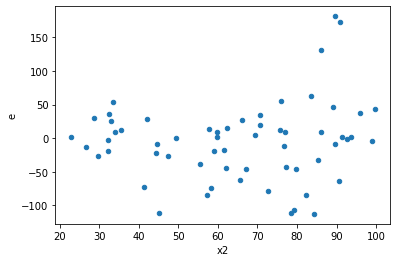

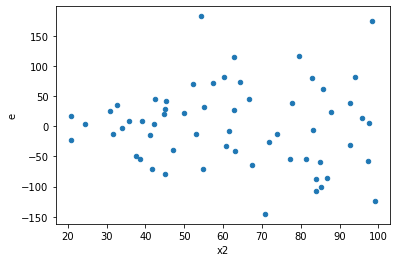

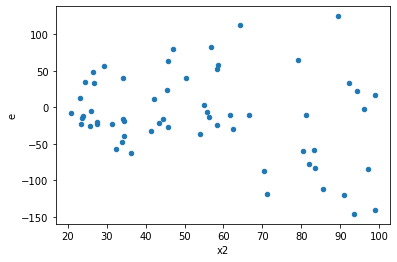

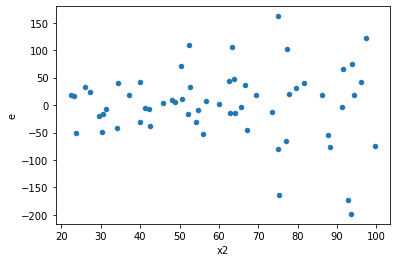

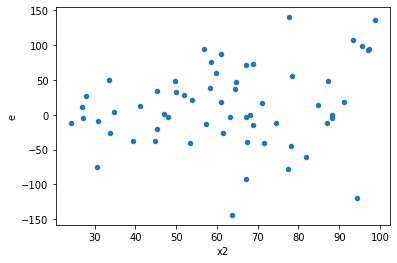

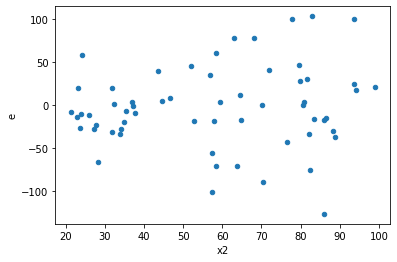

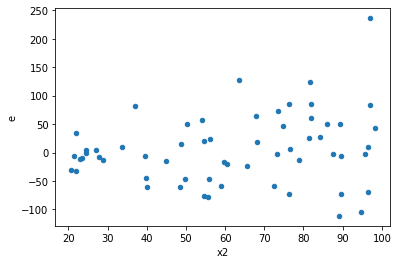

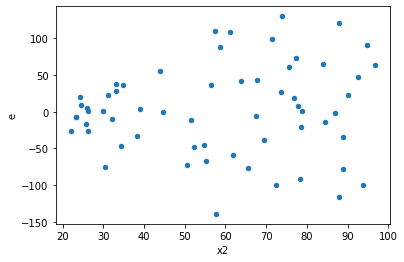

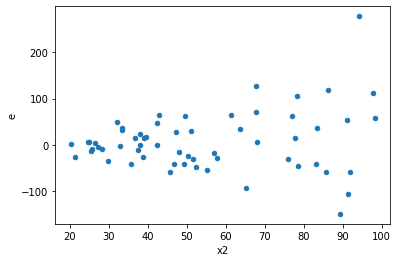

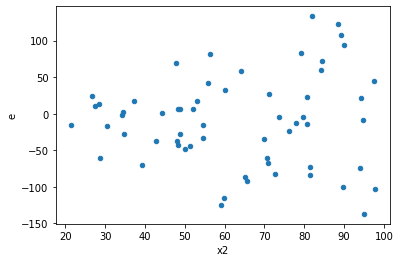

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,24621.267283769306,127196.84305020505,1172.4412992271098,6056.992526200241,5.166137127882733,0.00040294512644578617,0.9997985274367771,0.00020147256322289309,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,46679.275050575794,132921.6408010425,2222.82262145599,6329.601942906786,2.8475515238191966,0.02039324796969577,0.9898033760151521,0.010196623984847886,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,21160.26128087194,96669.39205055866,1007.6314895653304,4603.304383359936,4.568440378283233,0.0009855751686436154,0.9995072124156782,0.0004927875843218077,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,29448.43601070523,174407.97155205323,1402.306476700249,8305.141502478726,5.922486732016996,0.00014263208698350738,0.9999286839565082,7.131604349175369e-05,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,27389.41835599008,90019.41816383359,1304.2580169519085,4286.638960182552,3.286649500687418,0.008760180139180118,0.9956199099304099,0.004380090069590059,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,14132.909194684313,73403.20263940634,672.9956759373482,3495.3906018764924,5.193778692572004,0.0003872601495469308,0.9998063699252265,0.0001936300747734654,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,31988.824640699902,130117.30260343455,1523.2773638428525,6196.062028734978,4.067586229407259,0.0022088854594128904,0.9988955572702936,0.0011044427297064452,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,12570.91010483852,112604.22407096684,598.6147668970724,5362.105908141278,8.957523610611588,4.800841418184376e-06,0.9999975995792909,2.400420709092188e-06,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,11386.774880635063,189781.44443754482,542.2273752683363,9037.211639883088,16.6668302857464,1.7522528539259952e-08,0.9999999912387357,8.761264269629976e-09,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,24621.267283769306,127196.84305020505,1172.4412992271098,6056.992526200241,5.166137127882733,0.00040294512644578617,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,46679.275050575794,132921.6408010425,2222.82262145599,6329.601942906786,2.8475515238191966,0.02039324796969577,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,21160.26128087194,96669.39205055866,1007.6314895653304,4603.304383359936,4.568440378283233,0.0009855751686436154,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,29448.43601070523,174407.97155205323,1402.306476700249,8305.141502478726,5.922486732016996,0.00014263208698350738,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,27389.41835599008,90019.41816383359,1304.2580169519085,4286.638960182552,3.286649500687418,0.008760180139180118,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,14132.909194684313,73403.20263940634,672.9956759373482,3495.3906018764924,5.193778692572004,0.0003872601495469308,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,31988.824640699902,130117.30260343455,1523.2773638428525,6196.062028734978,4.067586229407259,0.0022088854594128904,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,12570.91010483852,112604.22407096684,598.6147668970724,5362.105908141278,8.957523610611588,4.800841418184376e-06,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,11386.774880635063,189781.44443754482,542.2273752683363,9037.211639883088,16.6668302857464,1.7522528539259952e-08,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    795
Reject001=1 : Homoscedasticity      205
Name: Result_test, dtype: int64